# Overview

In this project, we are to identify users who have logged into a product on three separate days in at least one seven-day period as 'adopted users', and which factors predict future user adoption(the indicators of an adopted user).  
      A   user   table   ( "takehome_users" )   with   data   on   12,000   users   who   signed   up   for   the  product   in   the   last   two   years.  
          A   usage   summary   table   ( "takehome_user_engagement" )   that   has   a   row   for   each   day  that   a   user   logged   into   the   product. 

## Methods

#### To identify adopted users, we calculate the time gap between consecutive logins(visits) of users. 
#### Then we calculate cumulative time gap with a rolling window of 2 steps.
#### Ruling out the cumulative time gaps generated by 2 different users, the adopted users are those who have at least one cumulatative gap between 2 and 6.
To illustrate this, let us write T to indicate a visit and F to indicate a non-visit in a daily basis. 
The cumulative gap belongs to the middle T in the following demonstration examples.

#### TTT corresponds to a gap sequence of (1,1), a cumulative gap of 2.
#### TFFTFFT corresponds to a gap sequence of (3,3), a cumulative gap of 6. 
#### TTFFFFT corresponds to a gap sequence of (1,5), a cumulative gap of 6.
#### TTFFFFFT corresponds to a gap sequence of (1,6), a cumulative gap of 7. (No guarantee of 3 visits in a 7-day period.)

## Findings

#### 1.There are 1607 adopted users, about 13%-14% of total.
#### 2.The features 'last_session_creation_time' and 'creation_time' are important factors that predict user adoption.

## Find Adopted Users

#### Import packages and load data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
user_engagement = pd.read_csv('C:/Users/Weicong Su/Desktop/DataScience/1481069814_relax_challenge/relax_challenge/takehome_user_engagement.csv')
user_engagement.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [3]:
user_engagement['time_stamp']= pd.to_datetime(user_engagement['time_stamp']) 
user_engagement.reset_index().drop(columns=['index']).head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


#### Calculate gaps between consecutive visits

In [4]:
Gap = pd.DataFrame(np.diff(user_engagement,axis=0)).iloc[:,0]
user_engagement = pd.concat([user_engagement,Gap],axis=1).rename(columns={0:'Gap'})
user_engagement.head()

,time_stamp,user_id,visited,Gap
0,2014-04-22 03:53:30,1,1,-159 days +23:51:34
1,2013-11-15 03:45:04,2,1,14 days 00:00:00
2,2013-11-29 03:45:04,2,1,10 days 00:00:00
3,2013-12-09 03:45:04,2,1,16 days 00:00:00
4,2013-12-25 03:45:04,2,1,6 days 00:00:00


In [5]:
user_engagement.Gap = user_engagement.Gap.apply(lambda x: pd.tslib.Timedelta(x).days)

C:\Anaconda\envs\snowflakes\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: pandas.tslib is deprecated and will be removed in a future version.
You can access Timedelta as pandas.Timedelta
  """Entry point for launching an IPython kernel.


#### Calculate Cumulative gaps

In [6]:
user_engagement['GapCumSum']=user_engagement.Gap.rolling(2).sum()
user_engagement.head()

,time_stamp,user_id,visited,Gap,GapCumSum
0,2014-04-22 03:53:30,1,1,-159.0,NaN
1,2013-11-15 03:45:04,2,1,14.0,-145.0
2,2013-11-29 03:45:04,2,1,10.0,24.0
3,2013-12-09 03:45:04,2,1,16.0,26.0
4,2013-12-25 03:45:04,2,1,6.0,22.0


#### Find the users that has at least 3 visits in at least one 7-day period. We look for records that have cumulative gaps between 2 and 6 wihout an ID change.

In [7]:
user_engagement['id_diff']=np.insert(np.diff(user_engagement.user_id),0,0)
user_engagement.head()

,time_stamp,user_id,visited,Gap,GapCumSum,id_diff
0,2014-04-22 03:53:30,1,1,-159.0,NaN,0
1,2013-11-15 03:45:04,2,1,14.0,-145.0,1
2,2013-11-29 03:45:04,2,1,10.0,24.0,0
3,2013-12-09 03:45:04,2,1,16.0,26.0,0
4,2013-12-25 03:45:04,2,1,6.0,22.0,0


In [8]:
user_engagement_3_times_a_week = user_engagement.loc[user_engagement.id_diff==0]
user_engagement_3_times_a_week = user_engagement_3_times_a_week.loc[user_engagement_3_times_a_week.GapCumSum <= 6]
user_engagement_3_times_a_week = user_engagement_3_times_a_week.loc[user_engagement_3_times_a_week.GapCumSum >=2 ]
user_engagement_3_times_a_week.head()

,time_stamp,user_id,visited,Gap,GapCumSum,id_diff
8,2014-02-08 03:45:04,2,1,1.0,6.0,0
9,2014-02-09 03:45:04,2,1,4.0,5.0,0
26,2013-02-17 22:08:03,10,1,2.0,5.0,0
29,2013-03-01 22:08:03,10,1,1.0,4.0,0
30,2013-03-02 22:08:03,10,1,3.0,4.0,0


In [9]:
len(user_engagement_3_times_a_week.user_id.unique())

1607

## Data Preprocessing

#### Load the data set 'users'

In [10]:
users = pd.read_csv('C:/Users/Weicong Su/Desktop/DataScience/1481069814_relax_challenge/relax_challenge/takehome_users.csv',encoding = "ISO-8859-1")
# https://stackoverflow.com/questions/18171739/unicodedecodeerror-when-reading-csv-file-in-pandas-with-python
users.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


#### Identify adopted users

In [11]:
import time
t = time.time()
users['adopted_user'] = np.isin(np.array(users.object_id),np.array(user_engagement_3_times_a_week.user_id.unique()))
elapsed = time.time()-t
print('elapsed time is ',elapsed, ' s.' )

elapsed time is  0.14177846908569336  s.


#### Drop unnecessary columns. 'org_id' might be useful though but there are too many categories which cannot be considered as numerics. We might as well drop it.

In [17]:
users = users.drop(columns=['object_id','name','email','org_id'])

#### Convert 'creation_time' to numerics ranging from 0 to 1

In [15]:
users['creation_time']= pd.to_datetime(users['creation_time']) 
users['creation_time']= pd.to_numeric(users['creation_time']) 

In [18]:
users.creation_time = users.creation_time/np.max(users.creation_time)

#### One-hot-encode 'creation_source'

In [19]:
users = pd.concat([users, pd.get_dummies(users.creation_source,prefix='creation')],axis=1)
users.head(10)

,creation_time,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,invited_by_user_id,adopted_user,creation_GUEST_INVITE,creation_ORG_INVITE,creation_PERSONAL_PROJECTS,creation_SIGNUP,creation_SIGNUP_GOOGLE_AUTH
0,0.997606,GUEST_INVITE,1.398139e+09,1,0,10803.0,False,1,0,0,0,0
1,0.987865,ORG_INVITE,1.396238e+09,0,0,316.0,True,0,1,0,0,0
2,0.973058,ORG_INVITE,1.363735e+09,0,0,1525.0,False,0,1,0,0,0
3,0.976903,GUEST_INVITE,1.369210e+09,0,0,5151.0,False,1,0,0,0,0
4,0.969264,GUEST_INVITE,1.358850e+09,0,0,5240.0,False,1,0,0,0,0
5,0.989837,GUEST_INVITE,1.387424e+09,0,0,11241.0,False,1,0,0,0,0
6,0.967299,SIGNUP,1.356010e+09,0,1,NaN,False,0,0,0,1,0
7,0.981273,PERSONAL_PROJECTS,NaN,1,1,NaN,False,0,0,1,0,0
8,0.987249,PERSONAL_PROJECTS,NaN,0,0,NaN,False,0,0,1,0,0
9,0.969233,ORG_INVITE,1.401833e+09,1,1,4143.0,True,0,1,0,0,0


In [20]:
users = users.drop(columns=['creation_source'])

#### Scale 'last_session_creation_time' to the range from 0 to 1

In [22]:
users.last_session_creation_time = users.last_session_creation_time.fillna(0)
users.last_session_creation_time = users.last_session_creation_time/np.max(users.last_session_creation_time)
users.head()

,creation_time,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,invited_by_user_id,adopted_user,creation_GUEST_INVITE,creation_ORG_INVITE,creation_PERSONAL_PROJECTS,creation_SIGNUP,creation_SIGNUP_GOOGLE_AUTH
0,0.997606,0.997198,1,0,10803.0,False,1,0,0,0,0
1,0.987865,0.995842,0,0,316.0,True,0,1,0,0,0
2,0.973058,0.972660,0,0,1525.0,False,0,1,0,0,0
3,0.976903,0.976566,0,0,5151.0,False,1,0,0,0,0
4,0.969264,0.969176,0,0,5240.0,False,1,0,0,0,0


#### Determine if a user is invited by another user. We will abandon inviters' IDs since there are too many categories.

In [23]:
users.invited_by_user_id = users.invited_by_user_id.isnull()
users.head()

,creation_time,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,invited_by_user_id,adopted_user,creation_GUEST_INVITE,creation_ORG_INVITE,creation_PERSONAL_PROJECTS,creation_SIGNUP,creation_SIGNUP_GOOGLE_AUTH
0,0.997606,0.997198,1,0,False,False,1,0,0,0,0
1,0.987865,0.995842,0,0,False,True,0,1,0,0,0
2,0.973058,0.972660,0,0,False,False,0,1,0,0,0
3,0.976903,0.976566,0,0,False,False,1,0,0,0,0
4,0.969264,0.969176,0,0,False,False,1,0,0,0,0


#### Convert booleans to floats

In [25]:
users.invited_by_user_id = users.invited_by_user_id.astype(float)
users.adopted_user = users.adopted_user.astype(float)
users.head(10)

,creation_time,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,invited_by_user_id,adopted_user,creation_GUEST_INVITE,creation_ORG_INVITE,creation_PERSONAL_PROJECTS,creation_SIGNUP,creation_SIGNUP_GOOGLE_AUTH
0,0.997606,0.997198,1,0,0.0,0.0,1,0,0,0,0
1,0.987865,0.995842,0,0,0.0,1.0,0,1,0,0,0
2,0.973058,0.972660,0,0,0.0,0.0,0,1,0,0,0
3,0.976903,0.976566,0,0,0.0,0.0,1,0,0,0,0
4,0.969264,0.969176,0,0,0.0,0.0,1,0,0,0,0
5,0.989837,0.989556,0,0,0.0,0.0,1,0,0,0,0
6,0.967299,0.967151,0,1,1.0,0.0,0,0,0,1,0
7,0.981273,0.000000,1,1,1.0,0.0,0,0,1,0,0
8,0.987249,0.000000,0,0,1.0,0.0,0,0,1,0,0
9,0.969233,0.999833,1,1,0.0,1.0,0,1,0,0,0


## Predictive Modeling 

#### Check if the data is balanced. The data has 13.39% of adopted users.

In [26]:
len(users.loc[users.adopted_user == 1])/len(users)

0.13391666666666666

#### Create train and test sets

In [27]:
X = users.drop(columns = ['adopted_user'])
y = users.adopted_user
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

#### Train, fit and predict

In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, roc_auc_score, precision_score
log = LogisticRegression(class_weight='balanced')
log.fit(X_train,y_train)
THRESHOLD = 0.8
y_pred = np.where(log.predict_proba(X_test)[:,1] > THRESHOLD, 1, 0)
cm_log = confusion_matrix(y_pred,y_test)
acc_log = accuracy_score(y_pred,y_test)
recall_log = recall_score(y_pred,y_test)
#roc_auc_log = roc_auc_score(y_pred,y_test)
#precision_score_log = precision_score(y_pred,y_test)
print('The confusion matrix is \n', cm_log)
print('True Negative = ', cm_log[0,0])
print('True Positive = ', cm_log[1,1])
print('False Negative = ', cm_log[1,0])
print('False Positive = ', cm_log[0,1])
# Souce Code for confusion matrix: 
# https://github.com/scikit-learn/scikit-learn/blob/b7b4d3e2f/sklearn/metrics/classification.py#L187
print('The accuracy score is ', acc_log)
print('The recall score is ', recall_log)
#print('The roc_auc_score is ', roc_auc_log)
#print('The precision_score is ', precision_score_log)

C:\Anaconda\envs\snowflakes\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


The confusion matrix is 
 [[2103  297]
 [   0    0]]
True Negative =  2103
True Positive =  0
False Negative =  0
False Positive =  297
The accuracy score is  0.87625
The recall score is  0.0


C:\Anaconda\envs\snowflakes\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)


#### Decision Tree

[0.37026191 0.60350238 0.00278132 0.00206608 0.0025825  0.00524037
 0.0053382  0.00373194 0.00302026 0.00147505]


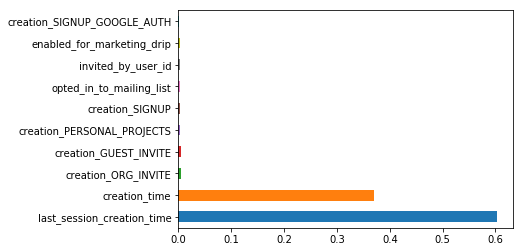

In [40]:
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
tree = DecisionTreeClassifier()
tree.fit(X_train,y_train)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X_train.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [41]:
THRESHOLD = 0.8
y_pred = np.where(tree.predict_proba(X_test)[:,1] > THRESHOLD, 1, 0)
cm_log = confusion_matrix(y_pred,y_test)
acc_log = accuracy_score(y_pred,y_test)
recall_log = recall_score(y_pred,y_test)
roc_auc_log = roc_auc_score(y_pred,y_test)
precision_score_log = precision_score(y_pred,y_test)
print('The confusion matrix is \n', cm_log)
print('True Negative = ', cm_log[0,0])
print('True Positive = ', cm_log[1,1])
print('False Negative = ', cm_log[1,0])
print('False Positive = ', cm_log[0,1])
# Souce Code for confusion matrix: 
# https://github.com/scikit-learn/scikit-learn/blob/b7b4d3e2f/sklearn/metrics/classification.py#L187
print('The accuracy score is ', acc_log)
print('The recall score is ', recall_log)
print('The roc_auc_score is ', roc_auc_log)
print('The precision_score is ', precision_score_log)

The confusion matrix is 
 [[2062   45]
 [  41  252]]
True Negative =  2062
True Positive =  252
False Negative =  41
False Positive =  45
The accuracy score is  0.9641666666666666
The recall score is  0.8600682593856656
The roc_auc_score is  0.9193554396121493
The precision_score is  0.8484848484848485


## Conclusion

#### 1.There are 1607 adopted users.
#### 2.The features 'last_session_creation_time' and 'creation_time' are good indicators of whether a user is an adopted user even though we can not completely determine if the user has at least 3 visits in at least one 7-day period.
#### 3.The performance of the tree model is much better than that of the logistic regression model.